<a href="https://colab.research.google.com/github/FranSC16/03MAIR---Algoritmos-de-Optimizacion/blob/main/TC/Francisco_Santiburcio_Cort%C3%A9s_Trabajo_Pr%C3%A1ctico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   Francisco Santiburcio Cortés

Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
>3. Combinar cifras y operaciones

Descripción del problema:

El problema consiste en analizar el siguiente problema y diseñar un algoritmo que los resuelva.

Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma (+), resta (-), multiplicación (*) y división (/).

Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad
dada. Un ejemplo sería para obtener el 4:

      4+2-6/3*1 = 4




(*) La respuesta es obligatoria





                                        

## Cuestiones

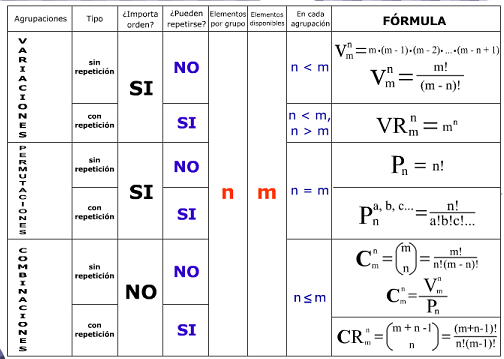


http://mcarmenmontano.blogspot.com/2012/04/blog-post.html

# (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>








**Respuesta:**

**·** Sin tener en cuenta las restricciones que el problema plantea, tenemos una lista de 9 números, de los cuales 5 de ellos han de combinarse permitiendo que se puedan repetir algunos de estos números, por tanto tenemos una variación de 9 números de orden 5, con repetición.

**Vm,n = m^n**

**Vm,n = V9,5 =9^5 = 59049 combinaciones**

**·** Por otro lado tenemos una lista de 4 símbolos, correspondientes a las operaciones matemáticas elementales respectivamente. Estos símbolos también se pueden repetir dentro la expresión posible de la solución por tanto, tenemos una permutación con repetición (**m = n**).

**Pn,a,b,c,... = n!/(a!b!c!...)**

Esta permutación depende de si dentro de la expresión que conforma la solución, se repite n veces un símbolo concreto, es decir, si se repite la suma 3 veces y la resta 1 vez tendríamos la siguiente permutación con repetición:

**Pn,a,b = P4,3,1 = 4!/(3! · 1!) = 4 combinaciones**

Si cada símbolo aparece una vez tendríamos una permutación sin repetición:

**Pn,a,b,c,d = P4,1,1,1,1 = 4!/ (1! · 1! · 1! · 1!) = 4! = Pn**

**·** Por tanto el número de combinaciones total dependerá de cuantos símbolos se repiten dentro de la expresión. Usando el caso peor de la permutación con repetición, que sería la permutación sin repetición, el número total de combinaciones sería el siguiente:

**Nº total de combinaciones = 59049*24 = 1417176 combinaciones posibles**

# ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

**Respuesta:**

**·** Tenemos una lista de 9 números, de los cuales 5 de ellos han de combinarse sin repetirse, por tanto tenemos una variación de 9 números de orden 5, sin repetición.

**Vm,n = m!/(m-n)!**

**Vm,n = V9,5 = 9!/4! = 15120 combinaciones**

**·** Por otro lado tenemos una lista de 4 símbolos, correspondientes a las operaciones matemáticas elementales respectivamente. Estos símbolos tampoco se pueden repetir dentro la expresión posible de la solución, y se han de usar todos los símbolos dentro de esa expresión por tanto, tenemos una permutación sin repetición (**m = n**).

**Pn = n!**

**Pn = P4 = 4! = 24 combinaciones**

**·** Por tanto el número de combinaciones total, es el producto de la variación sin repetición y de la permutación sin repetición:

**Nº total de combinaciones = 15120*24 = 362880 combinaciones posibles**


# (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


**·** Para este tipo de problema la mejor estructura de datos que se adecua a la naturaleza del problema son las listas. Como la solución consiste en una expresión matemática que da un resultado concreto, podemos usar una lista para esta solución, e ir añadiendo las posibles combinaciones hasta llegar al objetivo que es evaluar dicha expresión y nos dé el resultado que le metemos al principio como parámetro de entrada a la función. 

**·** Como vamos a necesitar que la solución vaya añadiendo elementos o borrándolos, no podemos usar tuplas, ya que estas son inmutables.


# (*)¿Cual es la función objetivo?


**·** La función objetivo es encontrar una expresión matemática formada por una combinación de números no repetidos y símbolos no repetidos que al evaluarla matemáticamente, de un resultado que coincida con la cantidad que le metemos la función como parámetro de entrada.


# (*)¿Es un problema de maximización o minimización?

**·** Es un problema de minimización ya que la función trata de llegar a esa expresión matemática en el menor número de iteraciones posibles.

# Diseña un algoritmo para resolver el problema por fuerza bruta

In [75]:

def fuerza_bruta(numeros,simbolos,solucion):
  sol_final = None
  sol = []
  # Primer Número de la expresión
  for i in range(len(numeros)):
    sol = []
    numeros_copy = numeros.copy()
    simbolos_copy = simbolos.copy()
    sol.append(numeros_copy[i])
    numeros_copy.pop(i)
    # Primer símbolo
    for j in range(len(simbolos_copy)):
      # A continuación se van a crear bufferes para almacenar los símbolos y números eliminados de las listas copiadas de las originales
      # con el fin de volver a insertarlos en estas listas si la expresión resultado de combinar números y símbolos no coincide con la solución.
      # De esta forma volvemos hacia atrás y volvemos a probar nuevas combinaciones.
      buf2 = simbolos_copy[j]
      sol.append(simbolos_copy[j])
      simbolos_copy.pop(j)
      # Segundo Número
      for c in range(len(numeros_copy)):
        buf3 = numeros_copy[c]
        sol.append(numeros_copy[c])
        numeros_copy.pop(c)
        # Segundo símbolo
        for k in range(len(simbolos_copy)):
          buf4 = simbolos_copy[k]
          sol.append(simbolos_copy[k])
          simbolos_copy.pop(k)
          # Tercer Número
          for l in range(len(numeros_copy)):
            buf5 = numeros_copy[l]
            sol.append(numeros_copy[l])
            numeros_copy.pop(l)
            # Tercer símbolo
            for n in range(len(simbolos_copy)):
              buf6 = simbolos_copy[n]
              sol.append(simbolos_copy[n])
              simbolos_copy.pop(n)
              # Cuarto Número
              for q in range(len(numeros_copy)):
                buf7 = numeros_copy[q]
                sol.append(numeros_copy[q])
                numeros_copy.pop(q)
                # Cuarto símbolo
                for w in range(len(simbolos_copy)):
                  buf8 = simbolos_copy[w]
                  sol.append(simbolos_copy[w])
                  simbolos_copy.pop(w)
                  # Quinto número
                  for r in range(len(numeros_copy)):
                    sol.append(numeros_copy[r])
                    # Con esta condición se evalua si la posible
                    # expresión da la solución
                    # recibida como parámetro de entrada
                    if eval(''.join(sol)) == solucion:
                      sol_final = ''.join(sol)
                    # Si no se cumple volvemos hacia atrás
                    # eliminando el último número
                    sol = sol[:-1]
                  # Si no encuentra ningún número que
                  # cumpla la condición eliminamos el anterior símbolo
                  # Y así sucesivamente
                  sol = sol[:-1]
                  simbolos_copy.insert(w,buf8)

                sol = sol[:-1]
                numeros_copy.insert(q,buf7)

              sol = sol[:-1]
              simbolos_copy.insert(n,buf6)

            sol = sol[:-1]
            numeros_copy.insert(l,buf5)

          sol = sol[:-1]
          simbolos_copy.insert(k,buf4)

        sol = sol[:-1]
        numeros_copy.insert(c,buf3)

      sol = sol[:-1]
      simbolos_copy.insert(j,buf2)

    sol = sol[:-1]

  return sol_final


In [76]:
numeros = ['1','2','3','4','5','6','7','8','9']
simbolos = ['+','-','*','/']
solucion = 10
expresion = fuerza_bruta(numeros,simbolos,solucion)
print("La expresion resultado es: "+str(expresion)+"="+str(solucion))

La expresion resultado es: 9/6*8-7+5


# Calcula la complejidad del algoritmo por fuerza bruta

Teniendo una lista de N1 números, y otra lista de N2 símbolos, fijándonos en la cantidad de bucles anidados que tenemos, la complejidad del algoritmo sería algo parecido a lo siguiente:

**N1·N2·(N1-1)·(N2-1)·(N1-2)·(N2-2)·(N1-3)·(N2-3)·(N1-4)**

Vemos como los tamaños de las listas se van reduciendo cada vez que se pasa de un bucle a otro bucle.

Tendríamos un orden de complejidad polinómico de un grado bastante alto.

Si el problema se complicase y la expresión resultante fuese muy mayor de 9 dígitos la complejidad del problema se dispararía a un orden factorial:

**n! = n·(n-1)·(n-2)·(n-3)·...(n-n)**

# (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

In [68]:
import matplotlib.pyplot as plt
def divide_venceras_recursiva(numeros,simbolos,solucion,objetivo,iterador,print_iteraciones):
  if len(numeros) == 4: # 5 de los 9 números han sido usados, quedan 4.
    # print(f"Posible Solucion {solucion}")
    if eval(solucion) == objetivo: # Evaluamos si la posible solución da el valor del objetivo
      # print("Solución Correcta\n")
      return solucion # Si se cumple la condición superior, hemos llegado a una solución del problema
    else:
      if print_iteraciones == True: print("Solución Incorrecta\n")# Si no se cumple, la solución es incorrecta, y volvemos un paso atrás
  else:
    if print_iteraciones == True:
      print(f"Numeros: {numeros} Simbolos: {simbolos}")
      print(f" Solución: {solucion}")
      print(f"  Objetivo: {objetivo}  Iterador: {iterador}")
    # plt.pause(0.5)
    if iterador % 2 == 1:
      # print("Numero\n")
      for num in numeros:
        sol = solucion+num # Concatenamos el numero de la lista numeros a la posible solucion
        numeros.remove(num) # Removemos dicho número de la lista
        sol = divide_venceras_recursiva(numeros.copy(),simbolos.copy(),sol,objetivo,iterador+1,print_iteraciones) # Recursividad
        numeros.append(num) # Volvemos a insertar en la lista el número que se elimino
        if sol is not None:
          # print("\n Devuelvo una posible solucion (Números): "+str(sol))
          return sol
    else:
      # print("Simbolo\n")
      for symb in simbolos:
        sol = solucion+symb # Concatenamos el símbolo de la lista símbolos a la posible solución
        simbolos.remove(symb) # Removemos dicho símbolo de la lista
        sol = divide_venceras_recursiva(numeros.copy(),simbolos.copy(),sol,objetivo,iterador+1,print_iteraciones)
        simbolos.append(symb) # Volvemos a insertar en la lista el símbolo que se elimino
        if sol is not None:
        # print("\n Devuelvo una posible solucion (Símbolos): "+str(sol))
          return sol

In [98]:
def divide_venceras(solucion):
  digits = [str(n) for n in range(1,10)]
  simbolos = ["+", "-", "/", "*"]
  return divide_venceras_recursiva(digits,simbolos,"", solucion, 1, False)

solucion = 66
start = time.time()
expresion = divide_venceras(solucion)
end = time.time()
print("La expresión: "+str(expresion)+"="+str(solucion))
print("Tarda un tiempo de :"+str(end-start))

La expresión: 5/1+9*7-2=66
Tarda un tiempo de :0.8715646266937256


Este algoritmo no consigue reducir la complejidad en el caso peor, ya que usamos la recursividad a modo de simular bucles y en la peor de las situaciones se deberían recorrer todas las opciones posibles. Lo único que lo diferencia del algoritmo de fuerza bruta es que una vez se consigue una solución correcta, la ejecución del programa se detiene evitando así tener que recorrer todas las posibles combinaciones.

# (*)Calcula la complejidad del algoritmo 

**·** La complejidad del algoritmo en el caso peor es la misma que la del algoritmo de fuerza bruta:

**N1·N2·(N1-1)·(N2-1)·(N1-2)·(N2-2)·(N1-3)·(N2-3)·(N1-4)**

Sim embargo en un caso donde la solución se encuentre antes de recorrer todas las posibles combinaciones el algoritmo de divide y vencerás marca una diferencia notoria en comparación con el algoritmo de fuerza bruta.

A continuación se hace una prueba para demostrar esto:

**Primera Prueba**

In [99]:
import time
digits = [str(n) for n in range(1,10)]
simbolos = ["+", "-", "/", "*"]
solucion = 7
start1 = time.time()
expresion_fuerza_bruta = fuerza_bruta(digits,simbolos,solucion)
start2 = time.time()
expresion_divide_venceras = divide_venceras(solucion)
start3 = time.time()
tiempo_fuerza_bruta = start2 - start1
tiempo_divide_venceras = start3 - start2

In [100]:
print("Expresion Fuerza Bruta: "+str(expresion_fuerza_bruta))
print("Tiempo Fuerza Bruta: "+str(tiempo_fuerza_bruta)+" segundos")
print("Expresion Divide y Vencerás: "+str(expresion_divide_venceras))
print("Tiempo Divide y Vencerás: "+str(tiempo_divide_venceras)+" segundos")

Expresion Fuerza Bruta: 9*8/6-7+2
Tiempo Fuerza Bruta: 2.9016220569610596 segundos
Expresion Divide y Vencerás: 1+4/3*9-6
Tiempo Divide y Vencerás: 0.18272805213928223 segundos


Se observa como se reduce el tiempo de ejecución con el algoritmo de divide y vencerás ya que ha encontrado una solución correcta en un tiempo óptimo en comparación con el algoritmo de fuerza bruta. (Probablemente porque no ha recorrido todas las posibles combinaciones)

**Segunda Prueba**

In [109]:
import time
digits = [str(n) for n in range(1,10)]
simbolos = ["+", "-", "/", "*"]
solucion = 99
start1 = time.time()
expresion_fuerza_bruta = fuerza_bruta(digits,simbolos,solucion)
start2 = time.time()
expresion_divide_venceras = divide_venceras(solucion)
start3 = time.time()
tiempo_fuerza_bruta = start2 - start1
tiempo_divide_venceras = start3 - start2

In [110]:
print("Expresion Fuerza Bruta: "+str(expresion_fuerza_bruta))
print("Tiempo Fuerza Bruta: "+str(tiempo_fuerza_bruta)+" segundos")
print("Expresion Divide y Vencerás: "+str(expresion_divide_venceras))
print("Tiempo Divide y Vencerás: "+str(tiempo_divide_venceras)+" segundos")

Expresion Fuerza Bruta: None
Tiempo Fuerza Bruta: 2.921294927597046 segundos
Expresion Divide y Vencerás: None
Tiempo Divide y Vencerás: 2.981646776199341 segundos


Cuando no existe ninguna expresión matemática que sea capaz de lograr la solución que tenemos de entrada, ambos algoritmos tardan aproximadamente lo mismo ya que recorren todas las posibles combinaciones. Esto demuestra que en el caso peor ambos algoritmos son muy similares en orden de complejidad y en el caso promedio el algoritmo de divide y vencerás es mucho más óptimo.

# Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [71]:
import random as rand
n = 4
lista_números_aleatorios = list()
[lista_números_aleatorios.append(rand.randint(10,100)) for w in range(n)]
lista_números_aleatorios

[29, 33, 60, 70]

# Aplica el algoritmo al juego de datos generado

In [72]:
for solucion in lista_números_aleatorios:
  print("La expresión: "+str(divide_venceras(solucion))+"="+str(solucion))

La expresión: 3+5*7/1-9=29
La expresión: 3+9*4/1-6=33
La expresión: 5/1+9*7-8=60
La expresión: 5+8*9/1-7=70


# Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Las referencias usadas son el temario de la asignatura y el blog indicado arriba, de donde se ha sacado la tablas que indica la cantidad de combinaciones posibles dependiendo de el tipo de combinatoria seleccionada, en nuestro caso permutación y variación.

# Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

**·** El problema se puede complicar hasta el punto de convertirse en un **NP-Hard**. Si se permite que los signos o los números se repitan dentro de la expresión el orden de complejidad crece muchísimo y habría que reajustar todo el código porque el problema ya no tiene restricciones de repetición.


In [121]:
import itertools as iter
import random as rd
numeros = [str(n) for n in range(1,10)]
rd.shuffle(numeros)
numeros_pt = list(iter.permutations(numeros)) # Permutacion con repeticion

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Solo con las permutaciones con repeticiones de 9 números sobrepasa el data_rate_limit